<a href="https://colab.research.google.com/github/LucyKinyua/Week3_MS/blob/main/Moringa_Data_Science_Prep_W3_Independent_Project_2021_05_Lucy_Kinyua_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

In this week's independent project, you will be working as Data Scientist for MTN Cote d'Ivoire, a leading telecom company and you will be solving for the following research question.

Currently MTN Cote d'Ivoire would like to upgrade its technology infrastructure for its mobile users in Ivory Coast. Studying the given dataset, how does MTN Cote d'Ivoire go about the upgrade of its infrastructure strategy within the given cities?

Your final deliverable will be a Data Report which will comprise the following sections;

1. Business Understanding 
2. Data Understanding 
3. Data Preparation 
4. Analysis 
5. Recommendation 
6. Evaluation

You can use the CRISP-DM methodology to guide you while working on the Data Report. Your Data Report will also need to have an objective account, with insights majorly coming from the dataset. However, you can refer to external information for supporting information. 

Below are some questions that can get you started;

1. Which ones were the most used city for the three days?
2. Which cities were the most used during business and home hours?
3. Most used city for the three days?
4. etc.

The telecom data provided for this project is only a sample ( i.e. for only three days).  The data files that you will need for this project will be as follows:

1. cells_geo_description.xlsx [Link]
2. cells_geo.csv [Link]
3. CDR_description.xlsx [Link]
4. CDR 20120507 [http://bit.ly/TelecomDataset1]
5. CDR 20120508 [http://bit.ly/TelecomDataset2]
6. CDR 20120509 [http://bit.ly/TelecomDataset3]

You will use Python for your analysis.

# Importing the Python libraries to be used and loading the datasets 

In [1]:
# Let's import the pandas library as well as the NumPy library
# 
import pandas as pd
import numpy as np

In [2]:
# Creating a Dataframe from the cells_geo.csv file 
# 
cells_geo_df = pd.read_csv('cells_geo.csv', sep = ';')
cells_geo_df.head(5)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [3]:
# Creating a Dataframe from the Telcom_dataset.csv file 
# 
df1 = pd.read_csv('Telcom_dataset.csv', delimiter = ',')
df1.head(5)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,#NAME?,#NAME?
4,Voice,14,06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [4]:
# Creating a Dataframe from the Telcom_dataset2.csv file 
# 
df2 = pd.read_csv('Telcom_dataset2.csv', delimiter = ',')
df2.head(5)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,#NAME?,#NAME?
3,Voice,37,04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,#NAME?,#NAME?


In [5]:
# Creating a Dataframe from the Telcom_dataset3.csv file 
# 
df3 = pd.read_csv('Telcom_dataset3.csv', delimiter = ',')
df3.head(5)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,61,01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,#NAME?,#NAME?
2,Voice,10,02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,#NAME?,#NAME?
4,Voice,22,03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


# Data Understanding & Data Preparation

In [6]:
# Merging the 3 Telecom datasets;
# 
telecom_df = pd.concat([df1,df2,df3], axis=0, sort=False)
telecom_df.head(5)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,#NAME?,#NAME?
4,Voice,14,06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [7]:
# Dropping the irrelevant columns in the telecom_df DataFrame;
# 
telecom_df.drop(['CELL_ON_SITE', 'COUNTRY_A','COUNTRY_B', 'DW_A_NUMBER_INT', 'DW_B_NUMBER_INT'], axis=1, inplace=True)
telecom_df.head(5)

,PRODUCT,VALUE,DATE_TIME,CELL_ID,SITE_ID
0,Voice,0,04:37.0,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,05:25.0,/+cKZKIp41,/+cKZKIp41
2,sms,25,05:41.0,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,05:42.0,#NAME?,#NAME?
4,Voice,14,06:29.0,051KhYDCpv,051KhYDCpv


In [8]:
# Describing the cells_geo dataset DataFrame;
# 
telecom_df.describe()

,VALUE
count,15003.000000
mean,25.548690
std,152.916219
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,12900.000000


In [9]:
# Dropping the irrelevant columns in the cells_geo dataset DataFrame;
# 
cells_geo_df.drop(['Unnamed: 0', 'LONGITUDE', 'LATITUDE', 'AREA'], axis=1, inplace=True)
cells_geo_df.head(5)

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",SUD COMOE,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",SUD COMOE,7a1029d2ab,8a1e6ce31f


In [10]:
# Describing the cells_geo dataset DataFrame;
# 
cells_geo_df.describe()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,CELL_ID,SITE_CODE
count,3974,3907,3974,3974,3968,3974,3974,3974
unique,504,1,2,15,33,19,3916,1029
top,COCODY,In Service,INTERIEUR,Grand-OUEST,ZONE D - Grand-OUEST,LAGUNE,6750e0fb7b,20387d4292
freq,354,3907,2305,528,527,1850,39,42


In [11]:
# Merging all the DataFrames;
# 
df = pd.merge(left=telecom_df, right=cells_geo_df, left_on='SITE_ID', right_on ='SITE_CODE')
# What's the size of the output data?
# 
df.shape
df

,PRODUCT,VALUE,DATE_TIME,CELL_ID_x,SITE_ID,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,CELL_ID_y,SITE_CODE
0,sms,0,00:00.0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,24ccdda3d5,1b5540c02d
1,sms,0,00:00.0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,ebfc58af70,1b5540c02d
2,sms,0,00:00.0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,ba8ce6e4ef,1b5540c02d
3,sms,0,00:00.0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,c2545171dc,1b5540c02d
4,sms,0,00:00.0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,f15bd5483f,1b5540c02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51192,Voice,17,01:42.0,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,LAGUNE,c179f33d5e,cc45940406
51193,Voice,17,01:42.0,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,LAGUNE,0a3f751619,cc45940406
51194,sms,0,01:43.0,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,0427a26d34,ab91f5b21d
51195,sms,0,01:43.0,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,VALLEE DU BANDAMA,7c72293cf2,ab91f5b21d


In [12]:
# Describing the df DataFrame;
# 
df.describe() # Only describes integer values

,VALUE
count,51197.000000
mean,28.074790
std,112.215941
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,6750.000000


# Modelling

In [14]:
df.groupby(['PRODUCT']).mean()

,VALUE
PRODUCT,
Voice,55.493068
sms,8.000643


In [15]:
df.groupby(['VILLES']).mean()

,VALUE
VILLES,
ABENGOUROU,46.822581
ABOBO,20.095914
ABOISSO,18.333333
ABOISSO COMOE,44.166667
ABONGOUA,1.000000
...,...
ZATTA,1.000000
ZIKISSO,26.888889
ZON-HOUNIEN,40.333333


In [21]:
grouped = df.groupby('VILLES').mean().reset_index()
grouped.sort_values('VALUE', ascending=False)

,VILLES,VALUE
332,SIPILOU,809.666667
268,NIABABLY,540.000000
32,ASSINIE,426.666667
391,ZAMBAKRO,347.333333
160,GONATE,291.000000
...,...,...
313,SANANFEREDOUGOU,0.000000
131,DOKE,0.000000
112,DIABO,0.000000
306,SAHUE,0.000000


In [23]:
# Which ones were the most used city for the three days?
# 
grouped = df.groupby(['PRODUCT', 'DATE_TIME', 'VILLES']).mean().reset_index()
grouped.sort_values('VALUE', ascending=False)

,PRODUCT,DATE_TIME,VILLES,VALUE
674,Voice,00:25.0,SIPILOU,2330.000000
1332,Voice,00:52.0,DAOUKRO,2212.000000
286,Voice,00:11.0,ASSINIE,1072.000000
382,Voice,00:14.0,GRAND-BASSAM,1052.000000
608,Voice,00:23.0,COCODY,1034.823529
...,...,...,...,...
3520,sms,00:27.0,WENDENE,0.000000
3524,sms,00:28.0,ABOISSO COMOE,0.000000
3525,sms,00:28.0,ADJAME,0.000000
3526,sms,00:28.0,ATTECOUBE,0.000000


In [25]:
# Which cities were the most used during business and home hours?
# 
grouped = df.groupby(['PRODUCT', 'DATE_TIME', 'VILLES']).mean().reset_index()
grouped.sort_values('DATE_TIME', ascending=False)
df.where()

,PRODUCT,DATE_TIME,VILLES,VALUE
5396,sms,01:54.0,ZADDI,0.0
5390,sms,01:54.0,AGBOVILLE,0.0
2803,Voice,01:54.0,DAOUKRO,0.0
2802,Voice,01:54.0,DALOA,1.0
2805,Voice,01:54.0,YOPOUGON,7.0
...,...,...,...,...
2822,sms,00:00.0,PLATEAU,0.0
2823,sms,00:00.0,SIANA,0.0
2824,sms,00:00.0,SINFRA,50.0
2825,sms,00:00.0,TREICHVILLE,25.0


In [ ]:
# 
# 


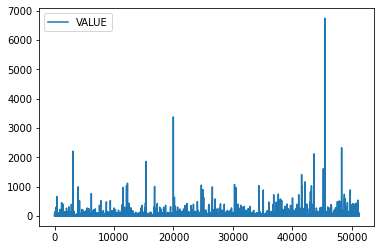

In [24]:
df.plot()

# Evaluation